<div class="alert alert-block alert-info" align=center><b>Mith: Fraud Detection </b>

</div>

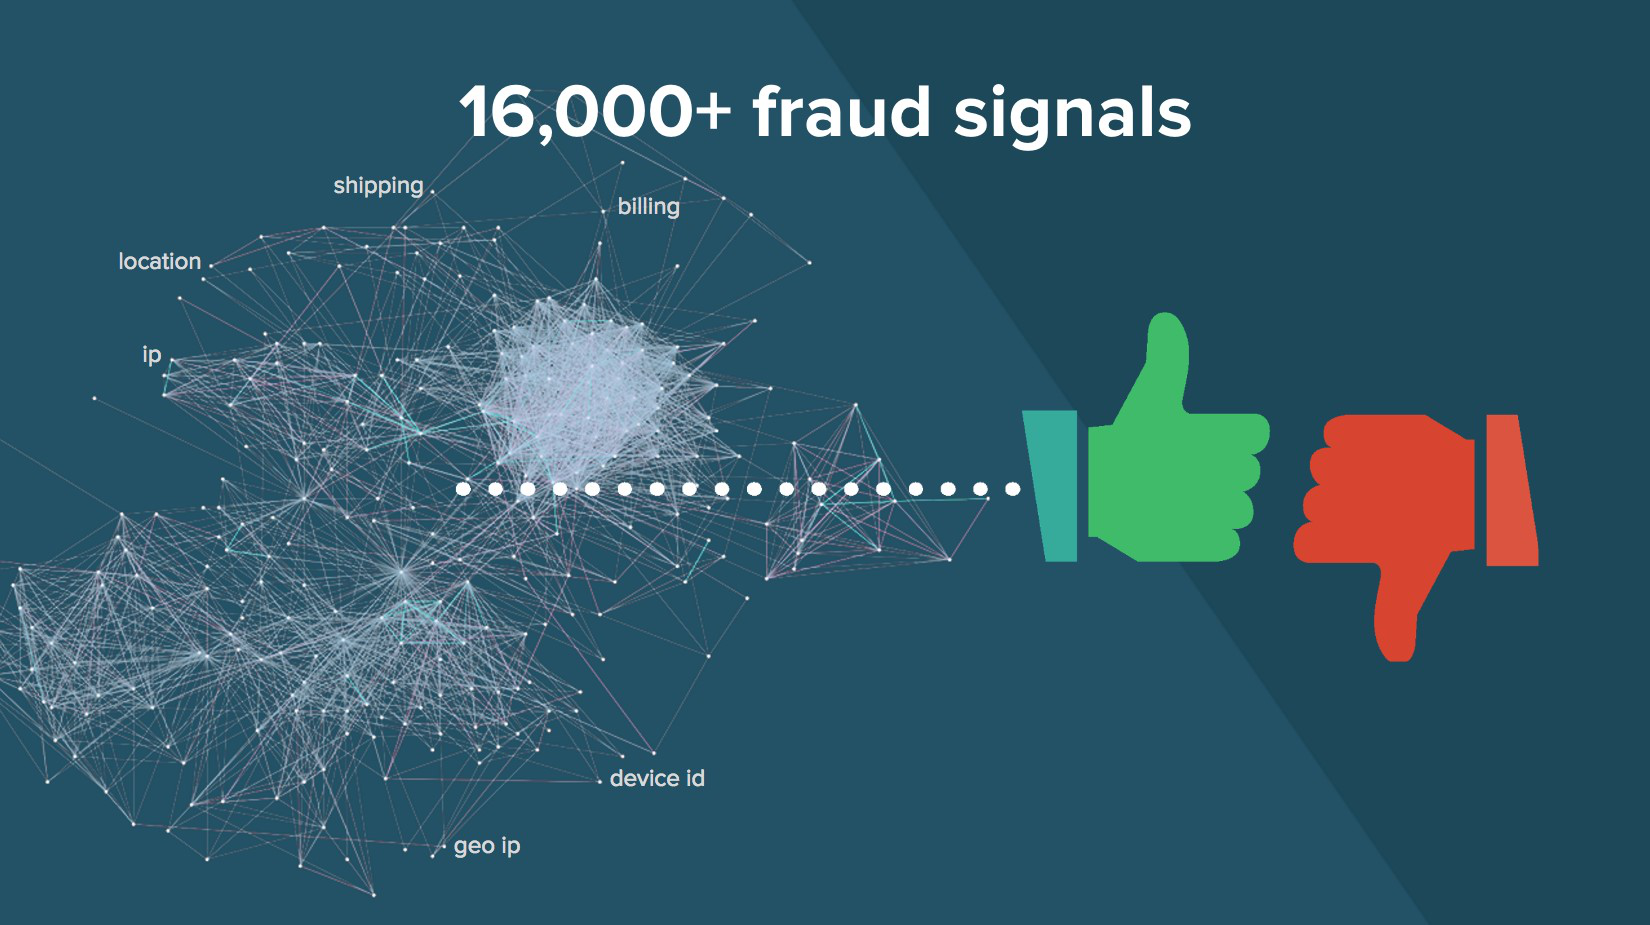

In [379]:
from IPython.display import Image
Image(filename='Pic_ss.png')

<div class="alert alert-block alert-info">
    TOPIC: FRAUD DETECTION <br>
    <br> Writer: Tushit Dave <br>
</div>

# Table of Content

<a id='Import Libraries'></a>
<b><a href='#Import Libraries'>Section-1 -> Import Libraries</a> 


<a rd='Read Dataset'></a>
<b><a href='#Read Dataset'>Section-2 -> Read Dataset</a>
    
<a id ='Hypothesis Generation'></a>
<b><a href=' Hypothesis Generation'> Section-3 -> Hypothesis Generation</a>
    
<a id ='Understanding the Data'></a>
<b><a href=' Understanding the Data'> Section-4 -> Understanding the Data</a>

#### Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install plotly
# !pip install squarify
import plotly
#import plotly.offline as pyoff
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
sns.set_style('darkgrid')
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

%matplotlib inline
import warnings;
warnings.filterwarnings("ignore");

#!pip install pandas-profiling

#### Read Dataset

In [2]:
df1= pd.read_csv("./train_merchant_data-1561627820784.csv")
df2= pd.read_csv("./train_order_data-1561627847149.csv")
df3 =pd.read_csv("./train-1561627878332.csv")

In [3]:
df1.head()

Ecommerce_Provider_ID  Merchant_ID Merchant_Registration_Date  \
0                1746213        50448        2018-05-01 21:15:11   
1                1746213       338754        2018-04-14 10:13:00   
2                1746213       291127        2018-06-20 07:44:22   
3                1746213       319919        2018-06-27 01:41:39   
4                1746213       195911        2018-01-05 00:55:41   

  Registered_Device_ID Gender  Age      IP_Address  
0        VATQMMZTVOZUT      F   39   48.151.136.76  
1        LJCILLBRQZNKS      M   35    94.9.145.169  
2        JFVHSUGKDAYZV      F   40   58.94.157.121  
3        WFRXMPLQYXRMY      M   37  193.187.41.186  
4        GGHKWMSWHCMID      F   27   125.96.20.172

In [4]:
df2.head()

Customer_ID      Order_ID     Date_of_Order  Order_Value_USD Order_Source  \
0       126221  37cea9512f8d  29-04-2018 16:39              148       Direct   
1       115471  09f12e6efde2  16-06-2018 17:05              145          SEO   
2       151786  4e69e956e159  26-10-2018 18:00               62          Ads   
3       140456  663443aaeb82  12-12-2018 05:41               28          SEO   
4       114721  99258810c121  20-09-2018 11:06               70          Ads   

  Order_Payment_Method  Merchant_ID  
0          Credit Card       124231  
1          Credit Card       136178  
2     Internet Banking       198611  
3           Debit Card       127993  
4          Credit Card       250146

In [5]:
df3.head()

Merchant_ID  Fraudster
0       221592          0
1       316935          1
2        38454          1
3       214437          1
4       296240          1

In [6]:
df4 = df1.merge(right=df2, how="inner", on="Merchant_ID")

In [7]:
df4.head()

Ecommerce_Provider_ID  Merchant_ID Merchant_Registration_Date  \
0                1746213        50448        2018-05-01 21:15:11   
1                1746213       338754        2018-04-14 10:13:00   
2                1746213       291127        2018-06-20 07:44:22   
3                1746213       319919        2018-06-27 01:41:39   
4                1746213       195911        2018-01-05 00:55:41   

  Registered_Device_ID Gender  Age      IP_Address  Customer_ID      Order_ID  \
0        VATQMMZTVOZUT      F   39   48.151.136.76       129697  3b8983a83c7b   
1        LJCILLBRQZNKS      M   35    94.9.145.169       117390  34b5eb921228   
2        JFVHSUGKDAYZV      F   40   58.94.157.121       120162  41a1c86ff08b   
3        WFRXMPLQYXRMY      M   37  193.187.41.186       128228  e8c3ad80d916   
4        GGHKWMSWHCMID      F   27   125.96.20.172       136029  e71ab1f26785   

      Date_of_Order  Order_Value_USD Order_Source Order_Payment_Method  
0  30-07-2018 10:59               90          SEO           Debit Card  
1  15-06-2018 11:19               98          SEO     Internet Banking  
2  13-08-2018 10:06               95          SEO          Credit Card  
3  22-07-2018 15:46              100       Direct             E-wallet  
4  16-04-2018 08:02               78          SEO             E-wallet

In [8]:
data=df4.merge(right=df3,how='inner',on="Merchant_ID")

In [9]:
data.head()

Ecommerce_Provider_ID  Merchant_ID Merchant_Registration_Date  \
0                1746213        50448        2018-05-01 21:15:11   
1                1746213       338754        2018-04-14 10:13:00   
2                1746213       291127        2018-06-20 07:44:22   
3                1746213       319919        2018-06-27 01:41:39   
4                1746213       195911        2018-01-05 00:55:41   

  Registered_Device_ID Gender  Age      IP_Address  Customer_ID      Order_ID  \
0        VATQMMZTVOZUT      F   39   48.151.136.76       129697  3b8983a83c7b   
1        LJCILLBRQZNKS      M   35    94.9.145.169       117390  34b5eb921228   
2        JFVHSUGKDAYZV      F   40   58.94.157.121       120162  41a1c86ff08b   
3        WFRXMPLQYXRMY      M   37  193.187.41.186       128228  e8c3ad80d916   
4        GGHKWMSWHCMID      F   27   125.96.20.172       136029  e71ab1f26785   

      Date_of_Order  Order_Value_USD Order_Source Order_Payment_Method  \
0  30-07-2018 10:59               90          SEO           Debit Card   
1  15-06-2018 11:19               98          SEO     Internet Banking   
2  13-08-2018 10:06               95          SEO          Credit Card   
3  22-07-2018 15:46              100       Direct             E-wallet   
4  16-04-2018 08:02               78          SEO             E-wallet   

   Fraudster  
0          0  
1          0  
2          0  
3          0  
4          0

In [10]:
# y=CHD["Target Variable"]
# X=CHD
 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [11]:
# data = pd.read_csv("")
# train = pd.read_csv("")
# test = pd.read_csv("")

In [12]:
#data.head()

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54213 entries, 0 to 54212
Data columns (total 14 columns):
Ecommerce_Provider_ID         54213 non-null int64
Merchant_ID                   54213 non-null int64
Merchant_Registration_Date    54213 non-null object
Registered_Device_ID          54213 non-null object
Gender                        54213 non-null object
Age                           54213 non-null int64
IP_Address                    54213 non-null object
Customer_ID                   54213 non-null int64
Order_ID                      54213 non-null object
Date_of_Order                 54213 non-null object
Order_Value_USD               54213 non-null int64
Order_Source                  54213 non-null object
Order_Payment_Method          54213 non-null object
Fraudster                     54213 non-null int64
dtypes: int64(6), object(8)
memory usage: 6.2+ MB


#### Hypothesis Generation

* Data set is all about Fraud Investigation and understand that the same is based on E-comemrce provider and we also details pertaining to registered devices and type of fraud took place i.e. - Debit card, credit card, internet baning etc.

- With a large amount of card information stored and transferred online, it has been become easier for hackers to get access to this information   :- Customer_ID, Gender, Age(DOB) etc.

- Hackers and fraudsters are good at making themselves unnoticed. However, there are a few things to detect fraud in your webshop:

- First-time customers

- Bigger than average orders

- Fast shipping

- Unusual location

- Large quantity of the same product

- Multiple shipping addresses

- Shipping and billing address is not the same

- Several cards used from the same IP address

- Payment information typed with capital letters

- Many transactions in a short amount of time



#### Understanding the Data

In [14]:
data.shape

(54213, 14)

In [15]:
data.columns

Index(['Ecommerce_Provider_ID', 'Merchant_ID', 'Merchant_Registration_Date',
       'Registered_Device_ID', 'Gender', 'Age', 'IP_Address', 'Customer_ID',
       'Order_ID', 'Date_of_Order', 'Order_Value_USD', 'Order_Source',
       'Order_Payment_Method', 'Fraudster'],
      dtype='object')

In [16]:
data.head(3)

Ecommerce_Provider_ID  Merchant_ID Merchant_Registration_Date  \
0                1746213        50448        2018-05-01 21:15:11   
1                1746213       338754        2018-04-14 10:13:00   
2                1746213       291127        2018-06-20 07:44:22   

  Registered_Device_ID Gender  Age     IP_Address  Customer_ID      Order_ID  \
0        VATQMMZTVOZUT      F   39  48.151.136.76       129697  3b8983a83c7b   
1        LJCILLBRQZNKS      M   35   94.9.145.169       117390  34b5eb921228   
2        JFVHSUGKDAYZV      F   40  58.94.157.121       120162  41a1c86ff08b   

      Date_of_Order  Order_Value_USD Order_Source Order_Payment_Method  \
0  30-07-2018 10:59               90          SEO           Debit Card   
1  15-06-2018 11:19               98          SEO     Internet Banking   
2  13-08-2018 10:06               95          SEO          Credit Card   

   Fraudster  
0          0  
1          0  
2          0

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54213 entries, 0 to 54212
Data columns (total 14 columns):
Ecommerce_Provider_ID         54213 non-null int64
Merchant_ID                   54213 non-null int64
Merchant_Registration_Date    54213 non-null object
Registered_Device_ID          54213 non-null object
Gender                        54213 non-null object
Age                           54213 non-null int64
IP_Address                    54213 non-null object
Customer_ID                   54213 non-null int64
Order_ID                      54213 non-null object
Date_of_Order                 54213 non-null object
Order_Value_USD               54213 non-null int64
Order_Source                  54213 non-null object
Order_Payment_Method          54213 non-null object
Fraudster                     54213 non-null int64
dtypes: int64(6), object(8)
memory usage: 6.2+ MB


In [18]:
data.describe(include = 'all')

Ecommerce_Provider_ID    Merchant_ID Merchant_Registration_Date  \
count                 54213.0   54213.000000                      54213   
unique                    NaN            NaN                      54213   
top                       NaN            NaN        2018-01-23 01:05:32   
freq                      NaN            NaN                          1   
mean                1746213.0  200395.176212                        NaN   
std                       0.0  115398.486895                        NaN   
min                 1746213.0       2.000000                        NaN   
25%                 1746213.0  100997.000000                        NaN   
50%                 1746213.0  200574.000000                        NaN   
75%                 1746213.0  300407.000000                        NaN   
max                 1746213.0  399993.000000                        NaN   

       Registered_Device_ID Gender           Age      IP_Address  \
count                 54213  54213  54213.000000           54213   
unique                51291      2           NaN           52028   
top           KJEKRMHEHLUOR      M           NaN  175.104.225.24   
freq                      9  31761           NaN               9   
mean                    NaN    NaN     33.122240             NaN   
std                     NaN    NaN      8.630091             NaN   
min                     NaN    NaN     18.000000             NaN   
25%                     NaN    NaN     27.000000             NaN   
50%                     NaN    NaN     32.000000             NaN   
75%                     NaN    NaN     39.000000             NaN   
max                     NaN    NaN     72.000000             NaN   

          Customer_ID      Order_ID     Date_of_Order  Order_Value_USD  \
count    54213.000000         54213             54213     54213.000000   
unique            NaN         54213             49145              NaN   
top               NaN  416ba6b8154a  08-01-2018 12:10              NaN   
freq              NaN             1                10              NaN   
mean    137966.285208           NaN               NaN        92.230240   
std      15563.516156           NaN               NaN        45.673263   
min     111234.000000           NaN               NaN        22.000000   
25%     124471.000000           NaN               NaN        55.000000   
50%     137864.000000           NaN               NaN        88.000000   
75%     151405.000000           NaN               NaN       122.000000   
max     165000.000000           NaN               NaN       385.000000   

       Order_Source Order_Payment_Method    Fraudster  
count         54213                54213  54213.00000  
unique            3                    5          NaN  
top             SEO          Credit Card          NaN  
freq          21884                21844          NaN  
mean            NaN                  NaN      0.09269  
std             NaN                  NaN      0.29000  
min             NaN                  NaN      0.00000  
25%             NaN                  NaN      0.00000  
50%             NaN                  NaN      0.00000  
75%             NaN                  NaN      0.00000  
max             NaN                  NaN      1.00000

In [19]:
import pandas_profiling
data.profile_report()

#### Profiling Insights:-

1) Few IP address has been used more than 6-7 times, Hence there could be chances of fraud If Same IP Address has been used in 24 hours duration for ordering the item.

2) Ecommerce Provider ID is constant hence needs to be ignored and dropped.

3) Customer Id needs to be dropped since the same have no role in identifying the fraud analysis.

3) Merchant_ID needs to evaluate W.R.T. to Date_of_Order along with respect to IP_Address Or Country.

4) Registered Device ID needs to be evaluated WRT country and USD Value.

#### Insights

1) Many Transaction in short period of time (Day) : Hence Registered devices and Order Date needs to be evaluated.

2) Given IP_Address :- Fraudester can be at remote location of inside the country can be fraudester. - Map Visulization W.R.T to IP_Address.

3) Order Value in USD :- Biggest order value in a day of order. hence plot between USD and Date of order.

4) Several cards can be used from same IP address to act on Fraud .

5) Order Source V/S Registered device and IP_Address to Analyze the situtaion.

In [20]:
data.isna().sum()

Ecommerce_Provider_ID         0
Merchant_ID                   0
Merchant_Registration_Date    0
Registered_Device_ID          0
Gender                        0
Age                           0
IP_Address                    0
Customer_ID                   0
Order_ID                      0
Date_of_Order                 0
Order_Value_USD               0
Order_Source                  0
Order_Payment_Method          0
Fraudster                     0
dtype: int64

In [21]:
data.dtypes

Ecommerce_Provider_ID          int64
Merchant_ID                    int64
Merchant_Registration_Date    object
Registered_Device_ID          object
Gender                        object
Age                            int64
IP_Address                    object
Customer_ID                    int64
Order_ID                      object
Date_of_Order                 object
Order_Value_USD                int64
Order_Source                  object
Order_Payment_Method          object
Fraudster                      int64
dtype: object

In [22]:
data.head(4)

Ecommerce_Provider_ID  Merchant_ID Merchant_Registration_Date  \
0                1746213        50448        2018-05-01 21:15:11   
1                1746213       338754        2018-04-14 10:13:00   
2                1746213       291127        2018-06-20 07:44:22   
3                1746213       319919        2018-06-27 01:41:39   

  Registered_Device_ID Gender  Age      IP_Address  Customer_ID      Order_ID  \
0        VATQMMZTVOZUT      F   39   48.151.136.76       129697  3b8983a83c7b   
1        LJCILLBRQZNKS      M   35    94.9.145.169       117390  34b5eb921228   
2        JFVHSUGKDAYZV      F   40   58.94.157.121       120162  41a1c86ff08b   
3        WFRXMPLQYXRMY      M   37  193.187.41.186       128228  e8c3ad80d916   

      Date_of_Order  Order_Value_USD Order_Source Order_Payment_Method  \
0  30-07-2018 10:59               90          SEO           Debit Card   
1  15-06-2018 11:19               98          SEO     Internet Banking   
2  13-08-2018 10:06               95          SEO          Credit Card   
3  22-07-2018 15:46              100       Direct             E-wallet   

   Fraudster  
0          0  
1          0  
2          0  
3          0

In [23]:
!pip install maxminddb-geolite2

In [24]:
from geolite2 import geolite2
import time

geo = geolite2.reader()
df_1 = data.loc[:,['IP_Address']]

def IP_info_1(ip):
    try:
        x = geo.get(ip)
    except ValueError:   #Faulty IP value
        return np.nan
    try:
        return x['country']['names']['en'] if x is not None else np.nan
    except KeyError:   #Faulty Key value
        return np.nan


s_time = time.time()
# # map IP --> country
# #apply(fn) applies fn. on all pd.series elements
df_1['IP_Address'] = df_1.loc[:,'IP_Address'].apply(IP_info_1)
print(df_1.head(), '\n')
print('Time:',str(time.time()-s_time)+'s \n')

print(type(geo.get('48.151.136.76')))

       IP_Address
0   United States
1  United Kingdom
2           Japan
3         Austria
4           China 

Time: 84.1541337966919s 

<class 'dict'>


In [25]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54213 entries, 0 to 54212
Data columns (total 1 columns):
IP_Address    46405 non-null object
dtypes: object(1)
memory usage: 3.3+ MB


In [26]:
my_data =pd.concat((data,df_1['IP_Address']),axis =1)
#print(my_data)

In [27]:
my_data.columns.values[-1:] = "country"

In [28]:
my_data.head(2)

Ecommerce_Provider_ID  Merchant_ID Merchant_Registration_Date  \
0                1746213        50448        2018-05-01 21:15:11   
1                1746213       338754        2018-04-14 10:13:00   

  Registered_Device_ID Gender  Age     IP_Address  Customer_ID      Order_ID  \
0        VATQMMZTVOZUT      F   39  48.151.136.76       129697  3b8983a83c7b   
1        LJCILLBRQZNKS      M   35   94.9.145.169       117390  34b5eb921228   

      Date_of_Order  Order_Value_USD Order_Source Order_Payment_Method  \
0  30-07-2018 10:59               90          SEO           Debit Card   
1  15-06-2018 11:19               98          SEO     Internet Banking   

   Fraudster         country  
0          0   United States  
1          0  United Kingdom

In [29]:
my_data.isna().sum()

Ecommerce_Provider_ID            0
Merchant_ID                      0
Merchant_Registration_Date       0
Registered_Device_ID             0
Gender                           0
Age                              0
IP_Address                       0
Customer_ID                      0
Order_ID                         0
Date_of_Order                    0
Order_Value_USD                  0
Order_Source                     0
Order_Payment_Method             0
Fraudster                        0
country                       7808
dtype: int64

In [30]:
my_data['country'].fillna('Not Available',inplace = True)

In [31]:
my_data.isna().sum()

Ecommerce_Provider_ID         0
Merchant_ID                   0
Merchant_Registration_Date    0
Registered_Device_ID          0
Gender                        0
Age                           0
IP_Address                    0
Customer_ID                   0
Order_ID                      0
Date_of_Order                 0
Order_Value_USD               0
Order_Source                  0
Order_Payment_Method          0
Fraudster                     0
country                       0
dtype: int64

In [32]:
#my_data.country.value_counts()

In [33]:
my_data.head()

Ecommerce_Provider_ID  Merchant_ID Merchant_Registration_Date  \
0                1746213        50448        2018-05-01 21:15:11   
1                1746213       338754        2018-04-14 10:13:00   
2                1746213       291127        2018-06-20 07:44:22   
3                1746213       319919        2018-06-27 01:41:39   
4                1746213       195911        2018-01-05 00:55:41   

  Registered_Device_ID Gender  Age      IP_Address  Customer_ID      Order_ID  \
0        VATQMMZTVOZUT      F   39   48.151.136.76       129697  3b8983a83c7b   
1        LJCILLBRQZNKS      M   35    94.9.145.169       117390  34b5eb921228   
2        JFVHSUGKDAYZV      F   40   58.94.157.121       120162  41a1c86ff08b   
3        WFRXMPLQYXRMY      M   37  193.187.41.186       128228  e8c3ad80d916   
4        GGHKWMSWHCMID      F   27   125.96.20.172       136029  e71ab1f26785   

      Date_of_Order  Order_Value_USD Order_Source Order_Payment_Method  \
0  30-07-2018 10:59               90          SEO           Debit Card   
1  15-06-2018 11:19               98          SEO     Internet Banking   
2  13-08-2018 10:06               95          SEO          Credit Card   
3  22-07-2018 15:46              100       Direct             E-wallet   
4  16-04-2018 08:02               78          SEO             E-wallet   

   Fraudster         country  
0          0   United States  
1          0  United Kingdom  
2          0           Japan  
3          0         Austria  
4          0           China

In [34]:
# my_data['Merchant_Registration_Date'] = pd.to_datetime(my_data['Merchant_Registration_Date'])
# my_data['Date'] = my_data['Merchant_Registration_Date'].dt.strftime('%Y-%m-%d')
# my_data['Time'] = my_data['Merchant_Registration_Date'].dt.strftime('%H:%M:%S')

In [35]:
# my_data['MR_Year'] = my_data['Merchant_Registration_Date'].dt.strftime('%Y')
# my_data['MR_Month'] = my_data['Merchant_Registration_Date'].dt.strftime('%m')
# my_data['MR_Date'] = my_data['Merchant_Registration_Date'].dt.strftime('%d')

In [36]:
# my_data.drop(['Merchant_Registration_Date','MR_Year','Ecommerce_Provider_ID',
#               ],axis =1,
#              inplace = True)

In [37]:
# my_data['Date_of_Order'] = pd.to_datetime(my_data['Date_of_Order'])
# my_data['Date'] = my_data['Date_of_Order'].dt.strftime('%Y-%m-%d')
# my_data['Time'] = my_data['Date_of_Order'].dt.strftime('%H:%M:%S')
# my_data['DOF_Year'] = my_data['Date_of_Order'].dt.strftime('%Y')
# my_data['DOF_Month'] = my_data['Date_of_Order'].dt.strftime('%m')
# my_data['DOF_Date'] = my_data['Date_of_Order'].dt.strftime('%d')

In [38]:
# my_data.drop(['Date_of_Order','Date','Time','DOF_Year'],axis =1,inplace = True)

In [39]:
my_data.IP_Address.unique()

array(['48.151.136.76', '94.9.145.169', '58.94.157.121', ...,
       '188.39.154.217', '116.20.101.178', '171.47.212.179'], dtype=object)

In [40]:
my_data.dtypes

Ecommerce_Provider_ID          int64
Merchant_ID                    int64
Merchant_Registration_Date    object
Registered_Device_ID          object
Gender                        object
Age                            int64
IP_Address                    object
Customer_ID                    int64
Order_ID                      object
Date_of_Order                 object
Order_Value_USD                int64
Order_Source                  object
Order_Payment_Method          object
Fraudster                      int64
country                       object
dtype: object

In [41]:
# import re

# my_data['IP_Address_first']=(my_data['IP_Address'].str.rsplit(".",expand=True))[0]
# my_data['IP_Address_second']=(my_data['IP_Address'].str.rsplit(".",expand=True))[1]
# my_data['IP_Address_third']=(my_data['IP_Address'].str.rsplit(".",expand=True))[2]
# my_data['IP_Address_fourth']=(my_data['IP_Address'].str.rsplit(".",expand=True))[3]
# my_data.drop(['IP_Address'],axis =1,inplace = True)
# my_data.drop(['Merchant_ID'],axis =1,inplace = True)

In [42]:
my_data.dtypes

Ecommerce_Provider_ID          int64
Merchant_ID                    int64
Merchant_Registration_Date    object
Registered_Device_ID          object
Gender                        object
Age                            int64
IP_Address                    object
Customer_ID                    int64
Order_ID                      object
Date_of_Order                 object
Order_Value_USD                int64
Order_Source                  object
Order_Payment_Method          object
Fraudster                      int64
country                       object
dtype: object

In [43]:
# my_data['Fraudster'] = pd.Categorical(my_data.Fraudster)
# my_data['Gender'] = pd.Categorical(my_data.Gender)
# my_data['Registered_Device_ID'] = pd.Categorical(my_data.Registered_Device_ID)
# my_data['Order_ID'] = pd.Categorical(my_data.Order_ID)
# my_data['Order_Source'] = pd.Categorical(my_data.Order_Source)
# my_data['Order_Payment_Method'] = pd.Categorical(my_data.Order_Payment_Method)
# my_data['country'] = pd.Categorical(my_data.country)
# my_data['MR_Month'] = my_data['MR_Month'].astype(int)
# my_data['MR_Date'] = my_data['MR_Date'].astype(int)
# my_data['DOF_Month'] = my_data['DOF_Month'].astype(int)
# my_data['DOF_Date'] = my_data['DOF_Date'].astype(int)
# my_data['IP_Address_first'] = my_data['IP_Address_first'].astype(int)
# my_data['IP_Address_second'] = my_data['IP_Address_second'].astype(int)
# my_data['IP_Address_third'] = my_data['IP_Address_third'].astype(int)
# my_data['IP_Address_fourth'] = my_data['IP_Address_fourth'].astype(int)

Independent variable(Cateogorical) ------ > Registered_Device_ID,Gender,Order_ID,Order_Source,Order_Payment_Method,country,


Independent Variable(Numerical) ---------->
Age,Customer_ID,Order_Value_USD,MR_Month,MR_Date,DOF_Month,DOF_Date,IP_Address_first,IP_Address_second,IP_Address_third,IP_Address_fourth


Target Variable(Cateogorical) ------------>Fraudster


In [44]:
my_data.drop(['Customer_ID','Ecommerce_Provider_ID','Merchant_Registration_Date'], axis =1)

Merchant_ID Registered_Device_ID Gender  Age       IP_Address  \
0            50448        VATQMMZTVOZUT      F   39    48.151.136.76   
1           338754        LJCILLBRQZNKS      M   35     94.9.145.169   
2           291127        JFVHSUGKDAYZV      F   40    58.94.157.121   
3           319919        WFRXMPLQYXRMY      M   37   193.187.41.186   
4           195911        GGHKWMSWHCMID      F   27    125.96.20.172   
5            51878        YSUUQMHOIJZHJ      M   30    10.119.144.96   
6           205612        VOQNWQHJUKFSZ      F   28  135.121.143.189   
7           300823        BQKBQIXSRMCHT      M   31     106.24.64.41   
8           172822        MKGAJACYBWCXO      F   27   160.16.202.244   
9           241476        JJHGNMWRZRCML      M   41     93.33.235.39   
10          282981        ENWOHXNLVKHUM      M   43  167.117.148.126   
11          209856        ZRGIOMOSCSWRY      F   41  168.129.203.251   
12          112383        FANJQIHNZCBLK      F   29   223.165.133.16   
13          224741        ZBMJYRLDFWDZH      M   33   22.147.247.152   
14           53780        IIVGTDWBOOCWF      F   23    197.35.41.113   
15          313525        QWKTKIPMQRAXM      F   26   111.238.209.74   
16          190744        GDPQAXLCESTGH      M   36    174.94.114.37   
17           27166        RKPZXEZTNVREZ      M   24    204.181.5.187   
18           19528        BXVJODDAGSUCB      M   26    223.44.210.52   
19          289039        ERCSCRGEPEMAZ      F   25  140.215.169.108   
20          279462        PRSFPXRRYRXQX      M   20    86.247.206.54   
21          341655        ANPBMJCRPNTAC      F   25     21.9.152.255   
22          163262        BHLVUPKGDEOZO      M   19   109.44.216.235   
23          252403        RLNKPJZWXTAAK      F   24   246.140.34.132   
24          298934        EYKIQWHOTRBHX      M   26   173.37.135.249   
25          262707        EJIPHRMSYBRQA      F   35  162.239.144.178   
26          241015        PDIBAVIROPLSD      F   24      61.225.60.9   
27          364918        MUSENEHGWDGEB      F   36   54.132.101.154   
28          235887        SPDMKWBYXVENN      F   22   244.201.12.138   
29          180180        DKKPRTIHNIQGV      M   42      33.9.85.146   
...            ...                  ...    ...  ...              ...   
54183       365046        USHBKAHEHQNYC      F   34   224.14.206.182   
54184       247679        KVITNDBZNBCBR      F   27    71.123.82.132   
54185       356755        PPSJAIJKREWHG      M   32   153.168.30.147   
54186       189989        NJCLAZCWJTNXH      M   37   205.254.76.203   
54187        42845        EKJPWHFOSMWEA      M   20   160.252.239.90   
54188       121182        TGYVEQALKAHJF      F   41    221.116.95.73   
54189       340922        APHJIEZLINQLB      F   23     49.85.84.218   
54190       224375        YDIJBSIEBXUMT      F   28   212.93.100.219   
54191        92605        EUETXCMELSZUG      F   35   68.197.244.251   
54192       328210        VPCOPKMHMXWOI      M   25    84.124.226.49   
54193       210473        UVXBUNGCOKGQQ      F   33   71.127.222.249   
54194       292414        BOFSQTHAHOCQM      M   46   246.226.240.69   
54195       230433        SBNGFLGDTPMAN      F   45   215.68.223.175   
54196       198679        OKJCSTKWSXZHJ      M   36   129.117.23.122   
54197       109696        KTUUNYXJYETCN      F   43      34.14.20.72   
54198       269730        UZDHVTNXUOMMV      M   51    241.15.73.139   
54199       182162        QADGTLORGGNAV      M   37   180.48.101.205   
54200       267359        ZOEHFCSFEUQEA      M   26    38.43.162.245   
54201       324846        YCMNPYLFZDNWI      F   33     175.14.144.5   
54202        37129        TQUQESKIABGIE      M   38   70.192.114.197   
54203       130918        NXGGOQJTKDCIC      M   42    23.114.201.46   
54204       240066        DMVAZRPOPFXWD      M   26    122.44.174.45   
54205        17407        WPSEVTFBENYNP      M   25       7.49.168.0   
54206       192970        PEIAFJWVEAHRM      M 

In [45]:
my_data.dtypes

Ecommerce_Provider_ID          int64
Merchant_ID                    int64
Merchant_Registration_Date    object
Registered_Device_ID          object
Gender                        object
Age                            int64
IP_Address                    object
Customer_ID                    int64
Order_ID                      object
Date_of_Order                 object
Order_Value_USD                int64
Order_Source                  object
Order_Payment_Method          object
Fraudster                      int64
country                       object
dtype: object

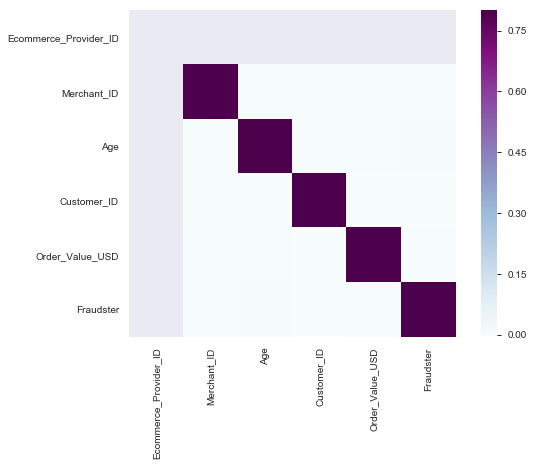

In [46]:
matrix = my_data.corr()
f,ax = plt.subplots(figsize =(9,6))
sns.heatmap(matrix , vmax = 0.8, square = True , cmap ='BuPu')

In [47]:
my_data['Date_of_Order'] = pd.to_datetime(my_data['Date_of_Order'])
my_data['Date'] = my_data['Date_of_Order'].dt.strftime('%Y-%m-%d')
my_data['Time'] = my_data['Date_of_Order'].dt.strftime('%H:%M:%S')
my_data['DOO_Year'] = my_data['Date_of_Order'].dt.strftime('%Y')
my_data['DOO_Month'] = my_data['Date_of_Order'].dt.strftime('%m')
my_data['DOO_Date'] = my_data['Date_of_Order'].dt.strftime('%d')

In [48]:
my_data.dtypes

Ecommerce_Provider_ID                  int64
Merchant_ID                            int64
Merchant_Registration_Date            object
Registered_Device_ID                  object
Gender                                object
Age                                    int64
IP_Address                            object
Customer_ID                            int64
Order_ID                              object
Date_of_Order                 datetime64[ns]
Order_Value_USD                        int64
Order_Source                          object
Order_Payment_Method                  object
Fraudster                              int64
country                               object
Date                                  object
Time                                  object
DOO_Year                              object
DOO_Month                             object
DOO_Date                              object
dtype: object

In [49]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
my_data['Registered_Device_ID'] = le.fit_transform(my_data['Registered_Device_ID'])
my_data['DOO_Date'] = my_data['DOO_Date'].astype(int)

In [50]:
my_data.dtypes

Ecommerce_Provider_ID                  int64
Merchant_ID                            int64
Merchant_Registration_Date            object
Registered_Device_ID                   int32
Gender                                object
Age                                    int64
IP_Address                            object
Customer_ID                            int64
Order_ID                              object
Date_of_Order                 datetime64[ns]
Order_Value_USD                        int64
Order_Source                          object
Order_Payment_Method                  object
Fraudster                              int64
country                               object
Date                                  object
Time                                  object
DOO_Year                              object
DOO_Month                             object
DOO_Date                               int32
dtype: object

#### Univariate Analysis

In [51]:
temp = my_data.Fraudster.value_counts()

In [52]:
trace = go.Bar(x=temp.index,
               y= np.round(temp.astype(float)/temp.values.sum(),2),
               text = np.round(temp.astype(float)/temp.values.sum(),2),
               textposition = 'inside',
               name = 'Fraudster')
data = [trace]
layout = go.Layout(
    autosize=False,
    width=600,
    height=400,title = "Fraudster Distribution"
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

 Data is inbalanced - 91% is "0" and 9% is "1".

In [53]:
temp = my_data.Gender.value_counts()
temp

M    31761
F    22452
Name: Gender, dtype: int64

In [54]:
trace = go.Bar(x=temp.index,
               y= np.round(temp.astype(float)/temp.values.sum(),2),
               text = np.round(temp.astype(float)/temp.values.sum(),2),
               textposition = 'inside',
               name = 'Gender')
data = [trace]
layout = go.Layout(
    autosize=False,
    width=600,
    height=400,title = "Gender Distribution"
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [55]:
def generate_layout_bar(col_name):
    layout_bar = go.Layout(
        autosize=False, # auto size the graph? use False if you are specifying the height and width
        width=800, # height of the figure in pixels
        height=600, # height of the figure in pixels
        title = "Distribution of {} column".format(col_name), # title of the figure
        # more granular control on the title font 
        titlefont=dict( 
            family='Courier New, monospace', # font family
            size=14, # size of the font
            color='black' # color of the font
        ),
        # granular control on the axes objects 
        xaxis=dict( 
        tickfont=dict(
            family='Courier New, monospace', # font family
            size=14, # size of ticks displayed on the x axis
            color='black'  # color of the font
            )
        ),
        yaxis=dict(
            title='Percentage',
            titlefont=dict(
                size=14,
                color='black'
            ),
        tickfont=dict(
            family='Courier New, monospace', # font family
            size=14, # size of ticks displayed on the y axis
            color='black' # color of the font
            )
        ),
        font = dict(
            family='Courier New, monospace', # font family
            color = "white",# color of the font
            size = 12 # size of the font displayed on the bar
                )  
        )
    return layout_bar

In [435]:
def plot_bar(col_name):
    # create a table with value counts
    temp = my_data[col_name].value_counts()
    # creating a Bar chart object of plotly
    data = [go.Bar(
            x=temp.index.astype(str), # x axis values
            y=np.round(temp.values.astype(float)/temp.values.sum(),4)*100, # y axis values
            text = ['{}%'.format(i) for i in np.round(temp.values.astype(float)/temp.values.sum(),4)*100],
        # text to be displayed on the bar, we are doing this to display the '%' symbol along with the number on the bar
            textposition = 'auto', # specify at which position on the bar the text should appear
        marker = dict(color = '#0069AB'),)] # change color of the bar
    # color used here Cobalt Blue
     
    layout_bar = generate_layout_bar(col_name=col_name)

    fig = go.Figure(data=data, layout=layout_bar)
    return iplot(fig)
    

In [436]:
temp = my_data.Order_Source.value_counts()
temp

SEO       21884
Ads       21259
Direct    11070
Name: Order_Source, dtype: int64

In [437]:
plot_bar('Order_Source')

In [438]:
temp = my_data.Order_Payment_Method.value_counts()
temp

Credit Card         21844
Internet Banking    13193
Debit Card           9070
E-wallet             8739
Cash On Delivery     1367
Name: Order_Payment_Method, dtype: int64

In [439]:
plot_bar('Order_Payment_Method')

In [440]:
plot_bar('country')

In [441]:
plot_bar('Date')

In [442]:
plot_bar('DOO_Month')

In [443]:
plot_bar('DOO_Date')

In [444]:
data = [go.Histogram(x=my_data.Order_Value_USD,
       marker=dict(
        color='#CC0E1D',# Lava (#CC0E1D)
#         color = 'rgb(200,0,0)'   `
    ))]
layout = go.Layout(title = "Histogram of USD")
fig = go.Figure(data= data, layout=layout)
iplot(fig)

In [445]:
trace0 = go.Box(
    y=my_data.Order_Value_USD,
    name = 'Box1',
    marker = dict(
        color = '#AA0505',
    )
)

data = [trace0]
layout = go.Layout(title = "Boxplot of USD")
fig = go.Figure(data= data, layout=layout)
iplot(fig)


In [446]:
data = [go.Histogram(x=my_data.Age,
       marker=dict(
        color='#242424',# gray14 (#242424)
#         color = 'RGB(36,36,36)'   `
    ))]
layout = go.Layout(title = "Histogram of AGE")
fig = go.Figure(data= data, layout=layout)
iplot(fig)

In [447]:
trace0 = go.Box(
    y=my_data.Age,
    name = 'Box1',
    marker = dict(
        color = '#CDCD00',
    )
)

data = [trace0]
layout = go.Layout(title = "Boxplot of Age")
fig = go.Figure(data= data, layout=layout)
iplot(fig)

##### Let's Bin Registered device colum

In [448]:
my_data.Registered_Device_ID.value_counts()

37835    9
41032    9
42138    9
2001     9
32261    9
33949    9
41977    9
34374    9
20580    9
8859     8
45186    8
4355     8
40059    8
6812     8
6471     8
25205    8
9610     8
4279     8
21410    8
41782    8
4656     8
50986    8
8952     8
3061     8
33297    8
23358    8
45570    8
50364    7
13212    7
45328    7
        ..
23265    1
21216    1
43711    1
41662    1
47805    1
35579    1
45820    1
47869    1
810      1
33594    1
39737    1
37688    1
49970    1
11055    1
9006     1
15149    1
13100    1
2859     1
6953     1
41726    1
4904     1
25382    1
31525    1
29476    1
19235    1
17186    1
23329    1
21280    1
43775    1
0        1
Name: Registered_Device_ID, Length: 51291, dtype: int64

In [315]:
my_data['Registered_Device_ID'] = my_data['Registered_Device_ID'].replace(to_replace=[1,2,3,4,5,6,7,8,9],
                                                        value=['Bin1','Bin2','Bin3',
                                                                               'Bin4','Bin5','Bin6','Bin7','Bin8','Bin9'])

In [316]:
temp = my_data['Registered_Device_ID'].value_counts()


In [317]:
print(my_data['Registered_Device_ID'])

0        41578
1        22546
2        18393
3        43814
4        12507
5        48762
6        42566
7         3320
8        24634
9        18653
10        9200
11       50582
12       10110
13       49396
14       16609
15       33426
16       12320
17       34474
18        3920
19        9420
20       31112
21        1090
22        2623
23       34538
24        9950
25        8849
26       29981
27       25401
28       36833
29        6912
         ...  
54183    40975
54184    21492
54185    30968
54186    26472
54187     8929
54188    38196
54189     1232
54190    47611
54191     9654
54192    42603
54193    41251
54194     3141
54195    35755
54196    28567
54197    21368
54198    41466
54199    31741
54200    50364
54201    47554
54202    38961
54203    27576
54204     7082
54205    44541
54206    30065
54207     6978
54208    20405
54209    32416
54210    50379
54211    25041
54212     1916
Name: Registered_Device_ID, Length: 54213, dtype: object


In [318]:
my_data.dtypes

Ecommerce_Provider_ID                  int64
Merchant_ID                            int64
Merchant_Registration_Date            object
Registered_Device_ID                  object
Gender                                object
Age                                    int64
IP_Address                            object
Customer_ID                            int64
Order_ID                              object
Date_of_Order                 datetime64[ns]
Order_Value_USD                        int64
Order_Source                          object
Order_Payment_Method                  object
Fraudster                              int64
country                               object
Date                                  object
Time                                  object
DOO_Year                              object
DOO_Month                             object
DOO_Date                               int32
dtype: object

### -Bivariate analysis

Ecommerce_Provider_ID -----------------> Column to be dropped
Merchant_ID----------------------------> Column to be dropped
Merchant_Registration_Date--------------> Date and Time segegation
Registered_Device_ID(object)------------> Not much insights from registered device however can be kept for future analysis
Gender(object)--------------------------> Categorical Variable, Analysis between Fraudester and Gender
Age(int64)------------------------------> Numerical Variable, Analysis between Fraudester and Age, Outlier Identified , Log needs to be applied
IP_Address(object)----------------------> New Feature 'Country' has been created , Hence can be dropped unless we want to see the relationship between fraudester and IP_Address usage in comparison with USD... Part of tri-varaite Analysis
Customer_ID(int64)----------------------> column to be dropped
Order_ID(object)------------------------> column to be dropped
Date_of_Order                 datetime64[ns]
Order_Value_USD(int64) -----------------> Numerical Variable , Bi-Variate Analysis between USD and Fraudester.
Order_Source(object)--------------------> Categorical variable, Bi-Variate Analysis between Source and Fraud
Order_Payment_Method(object)------------> Cateogorical Variable , Bi-Variate Analysis between Payment method and Fraud
Fraudster                              int64
country(object)-------------------------> Cateogorical Variable , grouping between country, USD and Fraud 
Date                                  object
Time                                  object
DOO_Year                              object
DOO_Month                             object
DOO_Date                               int32

###### Categorical Independent Variable vs Target Variable

### Does Biggest country has a chances of more fraudester cases

In [376]:
country_USD = my_data.groupby(['country','Order_Value_USD'])['Fraudster'].size().to_frame()
#country_USD = my_data.groupby(['Order_Value_USD','country'])['Fraudster'].value_counts().sort_values(ascending = False)
country_USD = country_fraud.reset_index()
#country_USD.head(5)
country_USD.columns = ['Fraudster','Order_Value_USD','country','Counts']
country_USD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 4 columns):
Fraudster          214 non-null int64
Order_Value_USD    214 non-null object
country            214 non-null int64
Counts             214 non-null int64
dtypes: int64(3), object(1)
memory usage: 6.8+ KB


In [356]:
np.random.seed(0)
country_USD.sample(frac =0.1)

Order_Value_USD  country                Fraudster
228              United States          0             10
130              United States          0            244
82               Australia              0             13
80               Brazil                 1              1
185              Pakistan               0              1
95               Vietnam                0              4
92               Tunisia                0              1
110              Portugal               0              5
152              India                  0              2
55               Turkey                 0              3
40               Luxembourg             0              1
55               Slovenia               0              2
52               Republic of Korea      0             29
42               Australia              0             10
50               China                  0             73
105              China                  0             66
110              Russia               

In [366]:
my_data['Fraudster'] = pd.Categorical(my_data.Fraudster)

In [367]:
print(type('Fraudster'))

<class 'str'>


In [368]:
plot_bar('Order_Value_USD')

In [334]:
country_fraud = my_data.groupby(['country','Fraudster']).size().to_frame()
country_fraud = country_fraud.reset_index()
country_fraud.columns = ['country','Fraudster','Counts']

In [ ]:
np.random.seed(0)
country_fraud.sample(frac =0.1)

In [242]:
my_data.groupby('Order_Value_USD')['Fraudster'].value_counts().sort_values(ascending = False)

Order_Value_USD  Fraudster
65               0            1077
88               0            1047
58               0            1041
60               0            1031
70               0            1026
72               0            1023
85               0            1020
75               0            1013
80               0            1013
95               0            1012
55               0            1010
68               0             995
45               0             993
78               0             981
50               0             977
98               0             970
82               0             968
92               0             962
38               0             961
62               0             959
90               0             950
48               0             941
52               0             914
102              0             903
35               0             885
105              0             885
100              0             884
42               0          

In [241]:
my_data.groupby(['Order_Value_USD','country'])['Gender'].value_counts().sort_values(ascending = False)

Order_Value_USD  country                Gender
58               United States          M         306
65               United States          M         286
60               United States          M         273
70               United States          M         271
98               United States          M         261
68               United States          M         260
88               United States          M         258
42               United States          M         250
72               United States          M         248
82               United States          M         246
55               United States          M         245
75               United States          M         242
85               United States          M         241
48               United States          M         239
80               United States          M         236
90               United States          M         235
100              United States          M         233
52               United States     

Use when needs to identify catogorical type and performance of each catogotic variable


g = sns.catplot(x="class", hue="who", col="survived",data=titanic, kind="count",height=4, aspect=.7);

###### Numerical Independent variable V/S Target Variable

In [36]:
#train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [37]:
# ## Binning Technique

# #train.loc[:,['ApplicantIncome', 'CoapplicantIncome']].head(10)

# bins = [0,1000, 3000, 45000]
# group = ['Low', 'Average', 'High']

# train['Co_Income_bin'] = pd.cut(df ['CoapplicantIncome'],bins , labels = group)
# Co_Income_bin = pd.crosstab(train['Co_Income_bin'],train['Loan_Status'])
# Co_Income_bin.div(Co_Income_bin.sum(1).astype(float),axis =0).plot(kind = 'bar' , stacked = True , figsize = (4,4))

In [38]:
#binning drop
#train = train.drop (['Income_bin','Co_Income_bin','Total_Income_bin','LoanAmount_bin','Total_Income'],axis =1)

In [39]:
#train.Dependents.value_counts

In [40]:
# Replace any value if needed 

# train['Dependents'].replace('3+',3,inplace = True)
# test['Dependents'].replace('3+',3,inplace = True)

# Replace target variable with 1 and 0

# train['Loan_Status'].replace('N',0,inplace= True)
# train['Loan_Status'].replace('Y',1,inplace = True)


In [41]:
# matrix = train.corr()
# f,ax = plt.subplots(figsize =(9,6))
# sns.heatmap(matrix , vmax = 0.8, square = True , cmap ='BuPu')

#### Outlier Treatment

In [25]:
# train['LoanAmount_log'] = np.log(train['LoanAmount'])
# train['LoanAmount_log'].hist(bins = 20)

# test['LoanAmount_log'] = np.log(test['LoanAmount'])

### Model-1 Implementation

-True Positive - Targets which are actually true(Y) and we have predicted them true(Y)

-True Negative - Targets which are actually false(N) and we have predicted them false(N)

-False Positive - Targets which are actually false(N) but we have predicted them true(T)

-False Negative - Targets which are actually true(T) but we have predicted them false(N)

Accuracy = (TP+TN)/(TP+TN+FN+FP)
Precision = It is measure of correctness achieved in "TRUE PREDICTION" of observation predicted as true, and how many are labeled as a "TRUE"

Precision = TP/(TP+FP)
Recall(Sensitivity) = It is a measure of actual observation which are predicted correctly, How many observations of true class are labeled correctly. It is known as "Sensitivity)

Recall = TP/(TP+FN)
Specificity - It is a measure of how many observations of false class are labeled correctly.

Specificity = TN / (TN + FP)
Specificity and Sensitivity plays a crucial role in deriving ROC curve.

ROC curve
Receiver Operating Characteristic(ROC) summarizes the model’s performance by evaluating the trade offs between true positive rate (sensitivity) and false positive rate(1- specificity).
The area under curve (AUC), referred to as index of accuracy(A) or concordance index, is a perfect performance metric for ROC curve. Higher the area under curve, better the prediction power of the model.

In [43]:
# # train = train.drop(['Loan_ID'],axis =1)
# # test = test.drop(['Loan_ID'],axis =1)

# # x = train.drop(['Loan_Status'],axis =1)
# # y = train.Loan_Status

# # x = pd.get_dummies(x)
# # train = pd.get_dummies(train)
# # test = pd.get_dummies(test)

# # x_train,x_cv,y_train,y_cv = train_test_split(x,y,test_size =0.3)

# # from sklearn.linear_model import LogisticRegression
# # from sklearn.metrics import accuracy_score

# # model = LogisticRegression()
# # model.fit(x_train,y_train)

# pred_cv = model.predict(x_cv)

# accuracy_score(y_cv,pred_cv)

In [ ]:
#( # xtr = xtrain
# #xvl = x validation
# #ytr = y train
# #yvl = y validation)

# i = 1
# kf = StratifiedKFold(n_splits=5, shuffle= True , random_state=1)
# for train_index,test_index in kf.split(x_train,y_train):
#     print('\n{} of kfold {}'.format(i,kf.n_splits))
#     xtr,xvl = x.loc[train_index], x.loc[test_index]
#     ytr,yvl = y[train_index],y[test_index]
#     model = LogisticRegression(random_state=1)
#     model.fit(xtr,ytr)
#     pred_test = model.predict(xvl)
#     score = accuracy_score(yvl,pred_test)
#     print('accuracy_score',score)
#     i+=1 
#     pred_test = model.predict(test) 
#     pred=model.predict_proba(xvl)[:,1]

In [28]:
# from sklearn import metrics
# #yvl = y-validation
# fpr,tpr,_ = metrics.roc_curve(yvl,pred)
# auc = metrics.roc_auc_score(yvl,pred)
# plt.figure(figsize=(12,8)) 
# plt.plot(fpr,tpr,label="validation, auc="+str(auc)) 
# plt.xlabel('False Positive Rate') 
# plt.ylabel('True Positive Rate') 
# plt.legend(loc=4) 
# plt.show()

### Feature Engineering

In [24]:
# train['Total_Income'] = train['ApplicantIncome']+train['CoapplicantIncome']
# test['Total_Income']= test['ApplicantIncome']+test['CoapplicantIncome']

In [49]:
# train['Total_Income_log'] = np.log(train['Total_Income'])
# sns.distplot(train['Total_Income_log'])

In [44]:
# test['Total_Income_log'] = np.log(test['Total_Income'])
# sns.distplot(test['Total_Income_log'])

### Model Building

In [45]:
# classifiers=[['Logistic Regression :',LogisticRegressionCV()],
#              ['SVM:',svm.LinearSVC()],
#        ['Decision Tree Classification :',DecisionTreeClassifier()],
#        ['Random Forest Classification :',RandomForestClassifier()],
#        ['Gradient Boosting Classification :', GradientBoostingClassifier()],
#        ['Ada Boosting Classification :',AdaBoostClassifier()],
#        ['Extra Tree Classification :', ExtraTreesClassifier()],
#        ['K-Neighbors Classification :',KNeighborsClassifier()],
#        ['Support Vector Classification :',SVC()],
#        ['Gaussian Naive Bayes :',GaussianNB()]]
# cla_pred=[]
# for name,model in classifiers:
#     model=model
#     model.fit(x_train,y_train)
#     predictions = model.predict(x_test)
#     cla_pred.append(accuracy_score(y_test,predictions))
#     print(name,accuracy_score(y_test,predictions))

In [53]:
# plt.bar(x=[1,2,3,4,5,6,7,8,9,10], height=np.multiply(cla_pred,100)
#         ,tick_label=['LR','SVM','DTC', 'RFC', 'GBC', 'ABC', 'ETC', 'KNN', 'SVC','GNB']
#         , color=["Blue","Green","red","orange","Yellow","cyan","pink","purple","black","violet"])
# plt.show()
